<a href="https://colab.research.google.com/github/fanfbryn/kmeans-clustering/blob/main/Final_Project_Sanber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Data_Negara_HELP.csv')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
df.shape

(167, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
df.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [ ]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
df.describe(include = np.object)

,Negara
count,167
unique,167
top,Myanmar
freq,1


In [ ]:
df.dropna(axis=0, inplace=True)
df.groupby('Negara').mean()
newdf=df.groupby('Negara').mean()
newdf

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
Negara,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


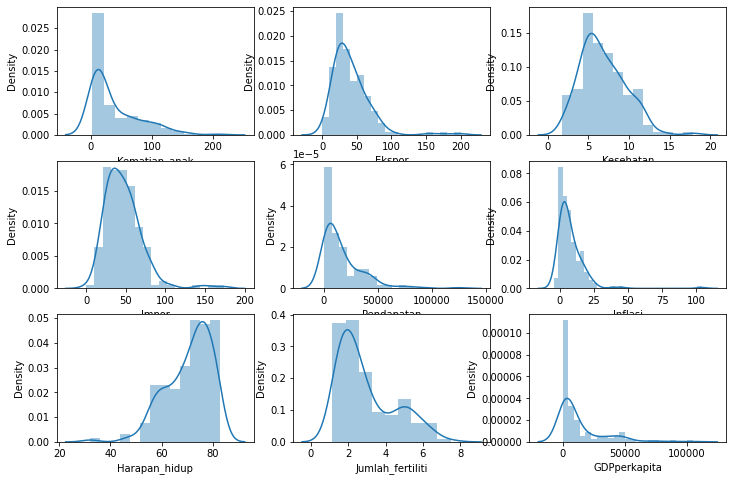

In [ ]:
plt.figure(figsize=(12,8))

for i in enumerate(df.describe().columns):
  plt.subplot(3,3, i[0]+1)
  sns.distplot(df[i[1]])
plt.show()

In [ ]:
newdf1 = df.sort_values('Kesehatan', ascending=True)
newdf1

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
123,Qatar,9.0,62.300,1.81,23.8000,125000,6.980,79.5,2.07,70300
107,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988
116,Pakistan,92.1,13.500,2.20,19.4000,4280,10.900,65.3,3.85,1040
38,"Congo, Rep.",63.9,85.100,2.46,54.7000,5190,20.700,60.4,4.95,2740
154,Turkmenistan,62.0,76.300,2.50,44.5000,9940,2.310,67.9,2.83,4440
...,...,...,...,...,...,...,...,...,...,...
110,Netherlands,4.5,72.000,11.90,63.6000,45500,0.848,80.7,1.79,50300
54,France,4.2,26.800,11.90,28.1000,36900,1.050,81.4,2.03,40600
132,Sierra Leone,160.0,16.800,13.10,34.5000,1220,17.200,55.0,5.20,399
101,"Micronesia, Fed. Sts.",40.0,23.500,14.20,81.0000,3340,3.800,65.4,3.46,2860


In [ ]:
newdf2 = df.sort_values('GDPperkapita', ascending=True)
newdf2

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.470,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399
...,...,...,...,...,...,...,...,...,...,...
44,Denmark,4.1,50.50,11.40,43.6,44000,3.220,79.5,1.87,58000
123,Qatar,9.0,62.30,1.81,23.8,125000,6.980,79.5,2.07,70300
145,Switzerland,4.5,64.00,11.50,53.3,55500,0.317,82.2,1.52,74600
114,Norway,3.2,39.70,9.48,28.5,62300,5.950,81.0,1.95,87800


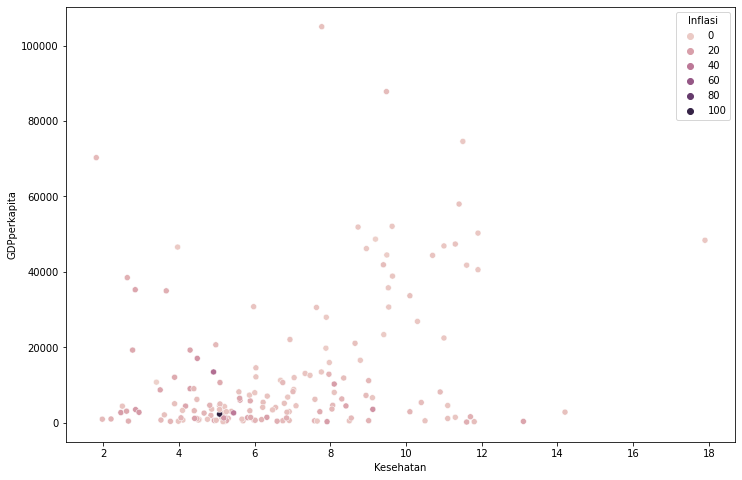

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(y='GDPperkapita', x='Kesehatan', hue='Inflasi', data=df)
plt.show()

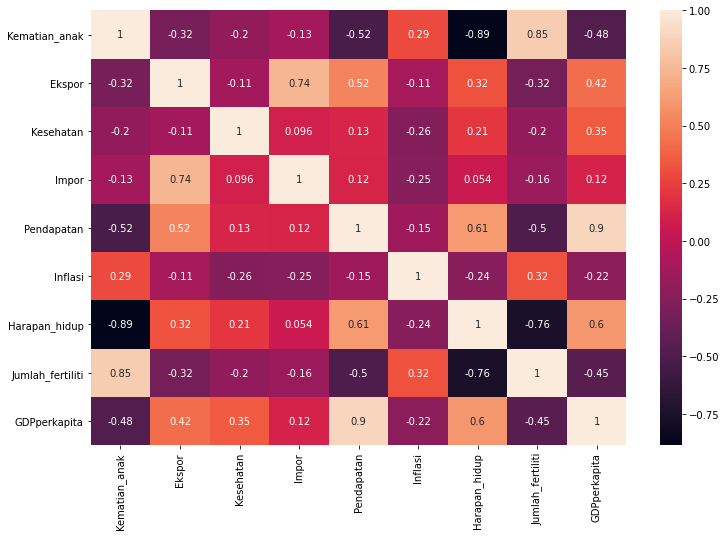

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2g');

<AxesSubplot:xlabel='GDPperkapita'>

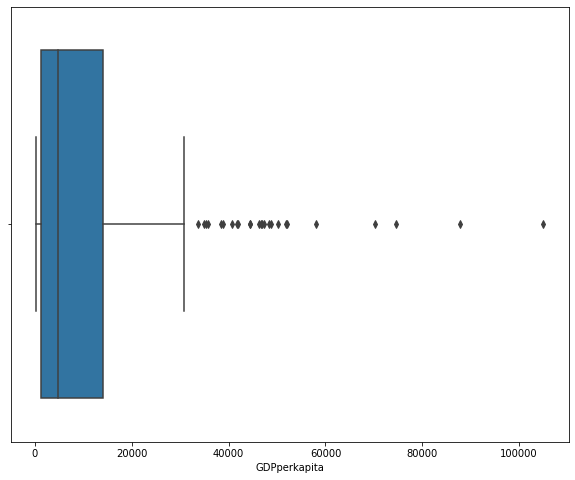

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot('GDPperkapita', data=df)

<AxesSubplot:xlabel='Kesehatan'>

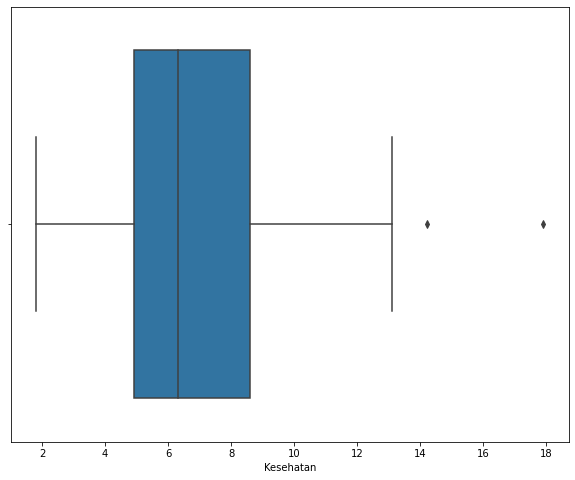

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot('Kesehatan', data=df)

In [ ]:
def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
print(finding_outlier(df['GDPperkapita']))
print(finding_outlier(df['Kesehatan']))

7       51900
8       46900
15      44400
23      35300
29      47400
44      58000
53      46200
54      40600
58      41800
68      41900
73      48700
75      35800
77      44500
82      38500
91     105000
110     50300
111     33700
114     87800
123     70300
133     46600
144     52100
145     74600
157     35000
158     38900
159     48400
Name: GDPperkapita, dtype: int64
101    14.2
159    17.9
Name: Kesehatan, dtype: float64


In [ ]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

In [ ]:
df2 = remove_outlier(df[['GDPperkapita', 'Kesehatan']])

df2.dropna(axis=0, inplace=True)
df2

,GDPperkapita,Kesehatan
0,553.0,7.58
1,4090.0,6.55
2,4460.0,4.17
3,3530.0,2.85
4,12200.0,6.03
...,...,...
162,2970.0,5.25
163,13500.0,4.91
164,1310.0,6.84
165,1310.0,5.18


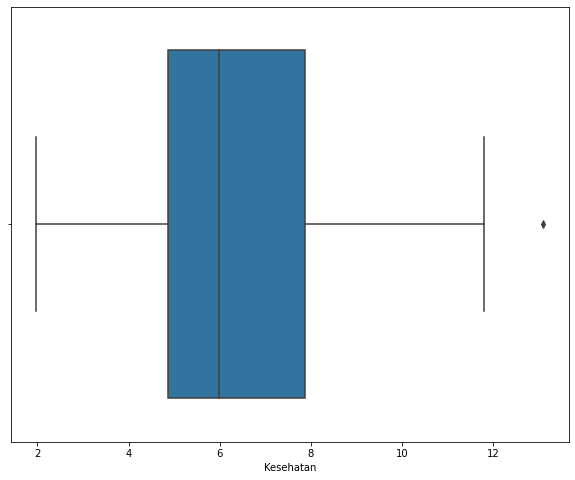

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot('Kesehatan', data=df2);

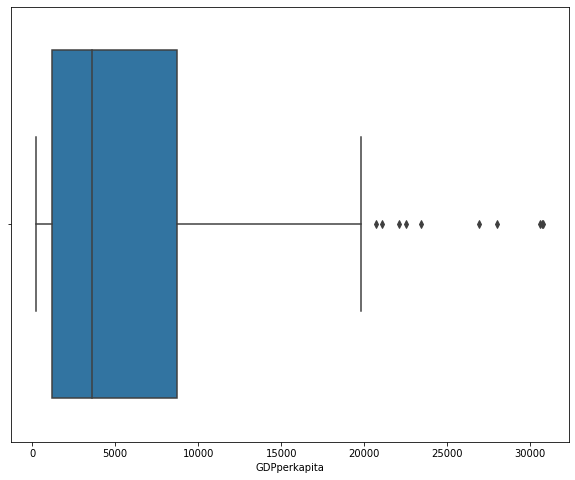

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot('GDPperkapita', data=df2);

In [ ]:
df2['GDPperkapita'].unique()

array([  553.,  4090.,  4460.,  3530., 12200., 10300.,  3220.,  5840.,
       28000., 20700.,   758., 16000.,  6030.,  4340.,  2180.,  1980.,
        4610.,  6350., 11200.,  6840.,   575.,   231.,   786.,  1310.,
        3310.,   446.,   897., 12900.,  4560.,  6250.,   769.,   334.,
        2740.,  8200.,  1220., 13500., 30800., 19800.,  5450.,  4660.,
        2600.,  2990., 17100.,   482., 14600.,  3650.,  8750.,   562.,
        2960., 26900.,  7370.,  2830.,   648.,   547.,  3040.,   662.,
       13100.,  1350.,  3110.,  6530.,  4500., 30600.,  4680.,  3680.,
        9070.,   967.,  1490.,   880.,  1140., 11300.,  8860.,  1170.,
         327., 12100., 12000.,  4540.,   413.,   459.,  7100.,   708.,
       21100.,  1200.,  8000.,  1630.,  2650.,  6680.,   419.,   988.,
        5190.,   592.,   348.,  2330., 19300.,  1040.,  8080.,  3230.,
        5020.,  2130., 12600., 22500.,  8230., 10700.,   563.,  3450.,
        1000.,  5410., 10800.,   399., 16600., 23400.,  1290.,  7280.,
      

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2.astype(float))

In [ ]:
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_
labels1

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
new_df = pd.DataFrame(data=df_std, columns=['GDPperkapita', 'Kesehatan'])
new_df['label1_kmeans'] = labels1
new_df

,GDPperkapita,Kesehatan,label1_kmeans
0,-0.818229,0.532117,1
1,-0.320335,0.079582,1
2,-0.268251,-0.966080,1
3,-0.399164,-1.546027,1
4,0.821289,-0.148882,0
...,...,...,...
136,-0.477994,-0.491578,1
137,1.004286,-0.640958,1
138,-0.711668,0.206995,1
139,-0.711668,-0.522333,1


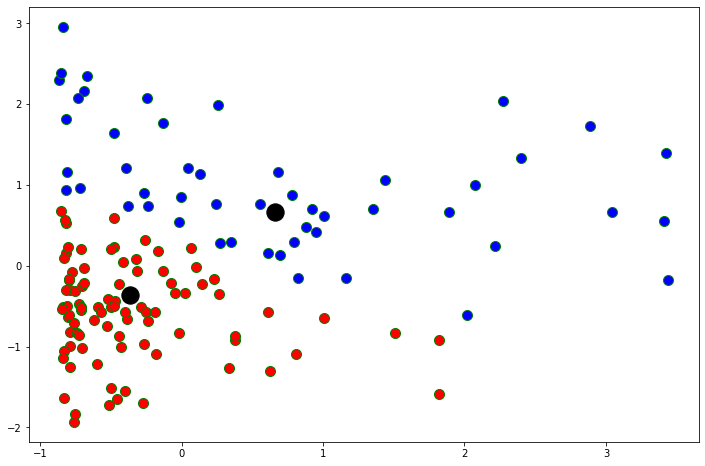

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans==0], new_df['Kesehatan'][new_df.label1_kmeans==0], c='blue', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label1_kmeans==1], new_df['Kesehatan'][new_df.label1_kmeans==1], c='red', s=100, edgecolors='green')

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,0], c='k', s=300)

plt.show()

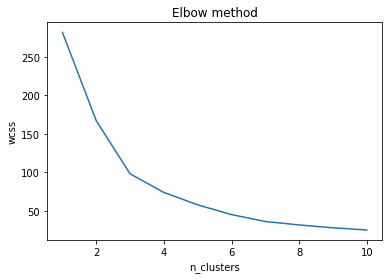

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_

In [ ]:
new_df['label2_kmeans'] = labels2
new_df

,GDPperkapita,Kesehatan,Inflasi,label3_kmeans,label2_kmeans
0,-0.807796,0.519310,0.368548,3,1
1,-0.311636,0.069962,-0.439656,2,1
2,-0.259733,-0.968336,1.455948,1,0
3,-0.390191,-1.544199,2.484571,1,0
4,0.826011,-0.156893,-0.937639,0,1
...,...,...,...,...,...
131,-0.691787,-0.252870,1.521258,1,0
132,-0.468746,-0.497176,-0.744977,2,1
133,-0.701606,0.196477,0.802855,1,0
134,-0.701606,-0.527714,2.680499,1,0


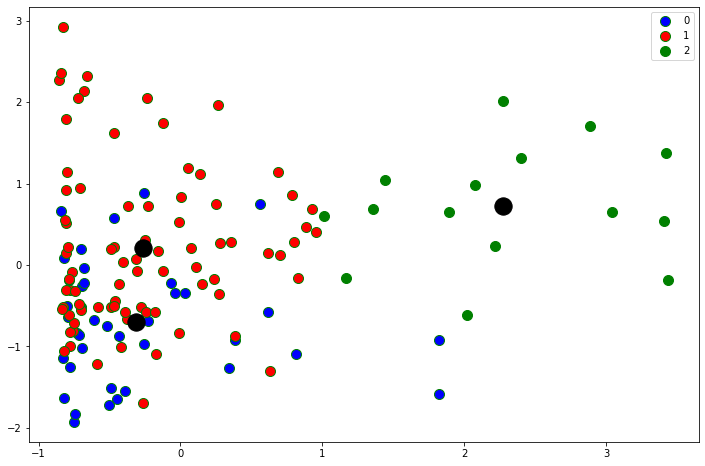

In [ ]:
plt.figure(figsize=(12,8))

plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==0], new_df['Kesehatan'][new_df.label2_kmeans==0], label='0', c='blue', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==1], new_df['Kesehatan'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['GDPperkapita'][new_df.label2_kmeans==2], new_df['Kesehatan'][new_df.label2_kmeans==2], label='2', c='green', s=100, edgecolors='green')


plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.4323768091297318
0.4416345225917429


In [ ]:
df['K_means_labels'] = pd.Series(labels2).astype('object')
df

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,NaN
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,NaN
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,NaN
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,NaN


In [ ]:
top = df[df['K_means_labels']==0]
top

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
20,Bosnia and Herzegovina,6.9,29.7,11.10,51.3,9720,1.400,76.8,1.31,4610,0
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0
36,Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
45,Dominican Republic,34.4,22.7,6.22,33.3,11100,5.440,74.6,2.60,5450,0
52,Fiji,24.1,57.8,4.86,63.9,7350,4.230,65.3,2.67,3650,0


In [ ]:
top.sort_values(by=['Kesehatan'],ascending=True)[:10]

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,K_means_labels
36,Comoros,88.2,16.5,4.51,51.7,1410,3.870,65.9,4.75,769,0
80,Kenya,62.2,20.7,4.75,33.6,2480,2.090,62.8,4.37,967,0
76,Jamaica,18.1,31.3,4.81,49.6,8000,9.810,74.7,2.17,4680,0
52,Fiji,24.1,57.8,4.86,63.9,7350,4.230,65.3,2.67,3650,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
28,Cameroon,108.0,22.2,5.13,27.0,2660,1.910,57.3,5.11,1310,0
105,Morocco,33.5,32.2,5.20,43.0,6440,0.976,73.5,2.58,2830,0
71,Iran,19.3,24.4,5.60,19.4,17400,15.900,74.5,1.76,6530,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0


In [ ]:
df3 = remove_outlier(df[['GDPperkapita', 'Kesehatan', 'Inflasi']])
df3.dropna(axis=0, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df3.astype(float))

In [ ]:
kmeans3 = KMeans(n_clusters = 4, init='k-means++', random_state=42).fit(df_std)
labels3 = kmeans3.labels_

In [ ]:
new_df = pd.DataFrame(data=df_std, columns=['GDPperkapita', 'Kesehatan', 'Inflasi'])
new_df['label3_kmeans'] = labels3
new_df

,GDPperkapita,Kesehatan,Inflasi,label3_kmeans
0,-0.807796,0.519310,0.368548,3
1,-0.311636,0.069962,-0.439656,2
2,-0.259733,-0.968336,1.455948,1
3,-0.390191,-1.544199,2.484571,1
4,0.826011,-0.156893,-0.937639,0
...,...,...,...,...
131,-0.691787,-0.252870,1.521258,1
132,-0.468746,-0.497176,-0.744977,2
133,-0.701606,0.196477,0.802855,1
134,-0.701606,-0.527714,2.680499,1


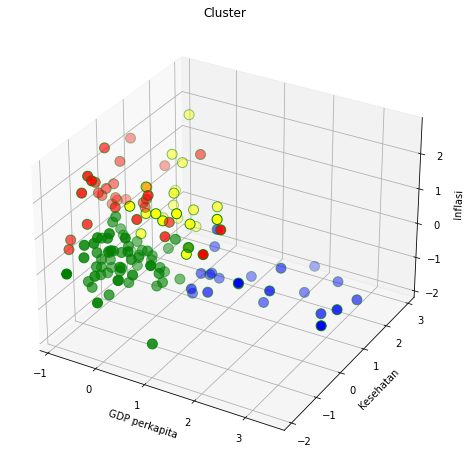

In [ ]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_df['GDPperkapita'][new_df.label3_kmeans==0], new_df['Kesehatan'][new_df.label3_kmeans==0], new_df['Inflasi'][new_df.label3_kmeans==0], c='blue', s=100, edgecolors='green')
ax.scatter(new_df['GDPperkapita'][new_df.label3_kmeans==1], new_df['Kesehatan'][new_df.label3_kmeans==1], new_df['Inflasi'][new_df.label3_kmeans==1], c='red', s=100, edgecolors='green')
ax.scatter(new_df['GDPperkapita'][new_df.label3_kmeans==2], new_df['Kesehatan'][new_df.label3_kmeans==2], new_df['Inflasi'][new_df.label3_kmeans==2], c='green', s=100, edgecolors='green')
ax.scatter(new_df['GDPperkapita'][new_df.label3_kmeans==3], new_df['Kesehatan'][new_df.label3_kmeans==3], new_df['Inflasi'][new_df.label3_kmeans==3], c='yellow', s=100, edgecolors='green')

# plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.title('Cluster')
plt.xlabel('GDP perkapita')
plt.ylabel('Kesehatan')
ax.set_zlabel('Inflasi')
plt.show()